In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import numpy as np
import seaborn as sns

### Load  preprocess data

In [25]:
# load original data
orig_data = pd.read_csv('data/mini_ml100k_user_10_item_25.csv', sep=',', encoding='latin-1')

# load synthetic data
syn_data =  pd.read_csv('output/synthetic_data/syn_complete_110321_0950.csv', sep=',', encoding='latin-1')
syn_data = syn_data[['user', 'item', 'rating']]

### Rating Distribution

C:\Anaconda\envs\recsys\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


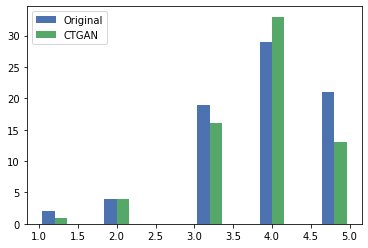

In [26]:
# plot rating distribution
plt.hist([orig_data['rating'], syn_data['rating']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

### Item Distribution

C:\Anaconda\envs\recsys\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


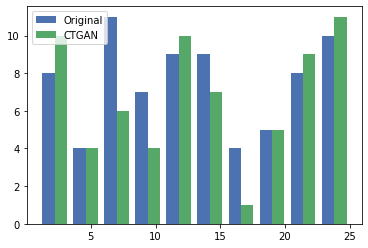

In [8]:
plt.hist([orig_data['item'], syn_data['item']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

In [61]:
df_items_orig = orig_data.groupby('item').size().reset_index(name='counts')
df_items_orig = df_items_orig.sort_values(by='counts', ascending=False)
df_items_orig.index.name = None

In [67]:
df_items_syn = syn_data.groupby('item').size().reset_index(name='counts')

In [83]:
# Sort syn data based on the sorting used for the original data,
# to keep the ratings comparable per item.
combined_sorted = pd.merge(df_items_orig, df_items_syn, on="item", how="outer").fillna(0)
combined_sorted['idx'] = range(1, (len(df_items_orig)+1))
#combined_sorted

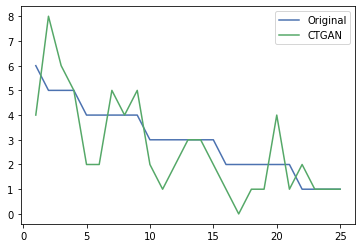

In [88]:
plt.plot(combined_sorted['idx'], combined_sorted['counts_x'], label='Original')
plt.plot(combined_sorted['idx'], combined_sorted['counts_y'], label='CTGAN')
plt.legend(loc='upper right')

### User Distribution

In [90]:
df_users_orig = orig_data.groupby('user').size().reset_index(name='counts')
df_users_orig = df_users_orig.sort_values(by='counts', ascending=False)
df_users_orig.index.name = None

In [91]:
df_users_syn = syn_data.groupby('user').size().reset_index(name='counts')

In [104]:
# Sort syn data based on the sorting used for the original data,
# to keep the ratings comparable per item.
combined_sorted_users = pd.merge(df_users_orig, df_users_syn, on="user", how="outer").fillna(0)
combined_sorted_users['idx'] = range(1, len(df_users_orig)+2)
combined_sorted_users

,user,counts_x,counts_y,idx
0,1,25.0,5.0,1
1,6,12.0,22.0,2
2,7,10.0,9.0,3
3,10,10.0,0.0,4
4,2,6.0,6.0,5
5,5,6.0,7.0,6
6,8,3.0,7.0,7
7,9,2.0,2.0,8
8,4,1.0,7.0,9
9,3,0.0,2.0,10


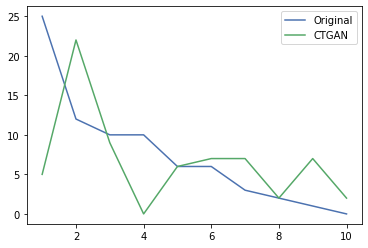

In [105]:
plt.plot(combined_sorted_users['idx'], combined_sorted_users['counts_x'], label='Original')
plt.plot(combined_sorted_users['idx'], combined_sorted_users['counts_y'], label='CTGAN')
plt.legend(loc='upper right')